In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def box_muller(u1, u2):
    """https://de.wikipedia.org/wiki/Box-Muller-Methode"""
    spread = np.sqrt(-2.0 * np.log(1.0 - u1))
    z1 = np.cos(2 * np.pi * u2) * spread
    z2 = np.sin(2 * np.pi * u2) * spread
    return z1, z2

In [3]:
# prepare data
std = 0.1
N = 10000

u1 = np.random.rand(N)
u2 = np.random.rand(N)

z1, z2 = box_muller(u1, u2)

x = np.random.rand(N)

y = x + std * z1

(-0.2, 1.2)

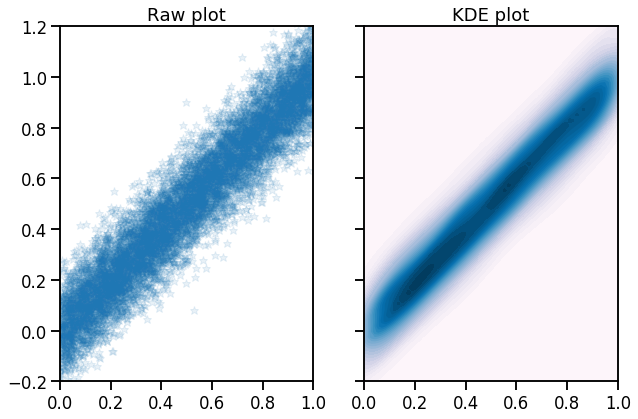

In [4]:
# plot as kde
fig, (ax1, ax2) = plt.subplots(
    figsize=(10, 8), ncols=2, sharey=True, subplot_kw={"aspect": 1}
)

ax1.plot(x, y, "*", alpha=0.1)
ax1.set_title("Raw plot")

npoints = 75j

xx, yy = np.mgrid[x.min() : x.max() : npoints, y.min() : y.max() : npoints]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

cnt = ax2.contourf(xx, yy, f, cmap="PuBu", levels=32)

# can reduce moire when viewing
for c in cnt.collections:
    c.set_edgecolor("face")

ax2.set_title("KDE plot")

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax1.set_ylim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)